# Assignment 04

Due Oct 4, 11:59pm. Please submit one .ipynb file to Beachboard. 

<p style='text-align: right; '> Put your name here </p>
<p style='text-align: right; '> Put the date here </p>

In the class, we have covered the topic of using Robust PCA to denoise the Yale Face images, with salt and pepper noise. In particular, we have defined a function to add random salt and pepper noise. In this assignment, you are asked to defined your own function to add patch noise to the images and then try to recover the original images. That is, you will create a mask with the same shape as your data tensor which will have value one for pathces of size (20, 20) position randomly in each sample. 

Please refer to [Robust Tensor PCA for Yale Faces](http://jeankossaifi.com/blog/rpca.html) website, for imformation related to this assignment. You may also review my [lecture video 10](https://csulb-my.sharepoint.com/:v:/g/personal/paul_sun_csulb_edu/EfnG5I020EdEh1mCp-hx6ToBaFLO4HYgpSkf5qeQwdki4A?e=EPCWtV) as well as [jupytor notebook from lecture 10](https://nbviewer.org/github/huiprobable/MATH578F22CSULB/blob/main/Lectures/yaleB_RPCA.ipynb)

In [2]:
from pathlib import Path
from urllib.request import urlretrieve
import zipfile
from matplotlib.pyplot import imread
from scipy.ndimage.interpolation import zoom#
import numpy as np


def fetch_cropped_yaleb(data_folder, zooming=0.5, max_n_subjects=None):
    """Returns a dictionary of paths
    
    Parameters
    ----------
    data_folder: string
    zooming: float, optional, default is 0.5
        factor by which to resize the images
    max_n_subjects: {None, int}, optional, default is None
        if not None, only the first max_n_subjects are returned
    
    Returns
    -------
    dict: {
        subjects_1: {'images': [image_1, ... image_N],
               'ambient': image_ambient,
        }
    }
    
    images are stored as numpy arrays
    """
    url = 'http://vision.ucsd.edu/extyaleb/CroppedYaleBZip/CroppedYale.zip'
    yaleb_path = Path(data_folder).joinpath('cropped_yaleb')
    
    if not yaleb_path.joinpath('CroppedYale').exists():
        yaleb_path.mkdir(parents=True)
    
    # If not already unzip, do it
    if not list(yaleb_path.iterdir()):
        zip_path = yaleb_path.joinpath('yaleb.zip')
        
        # If zip not already downloaded, download it
        if not zip_path.exists():
            urlretrieve(url, zip_path.as_posix())
        
        zfile = zipfile.ZipFile(zip_path.as_posix())
        zfile.extractall(path=yaleb_path.as_posix())

    yaleb = {}
    for folder_path in yaleb_path.joinpath('CroppedYale').iterdir():
        if max_n_subjects is not None and len(yaleb) > max_n_subjects:
            return yaleb
        
        if not folder_path.is_dir():
            continue
            
        video_name = folder_path.name
        paths = sorted(list(folder_path.glob('*.pgm')))
        images = []
        for path in paths:
            if 'Ambient' in path.name:
                ambient = imread(path.as_posix())
            else:
                images.append(zoom(imread(path.as_posix()), zooming)[None, ...])
                
        data = {'images':np.concatenate(images),
        'ambient':ambient}
        yaleb[video_name] = data

    return yaleb

In [3]:
dataset_path = '/data/tensorly_data/'

data = fetch_cropped_yaleb(dataset_path, zooming=0.3, max_n_subjects=5)

In [4]:
data['yaleB01']['ambient'].shape

(192, 168)

In [5]:
X = np.concatenate([data[key]['images'] for key in data], axis=0)

print(X.shape)

(384, 58, 50)


In [6]:
X = X.astype(np.float64)
X -= X.mean()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualise_images(X, n_images, n_columns, randomise=True):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    indices = indices[:n_images]
    cmap = plt.cm.Greys_r
    n_rows = np.ceil(n_images / n_columns).astype(int)
    fig = plt.figure(figsize=(2*n_columns, 2*58/50*n_rows))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # plot the digits: each image is 8x8 pixels
    for i, e in enumerate(indices):
        ax = fig.add_subplot(n_rows, n_columns, i + 1, xticks=[], yticks=[])
        ax.imshow(X[e], cmap=cmap, interpolation='nearest')

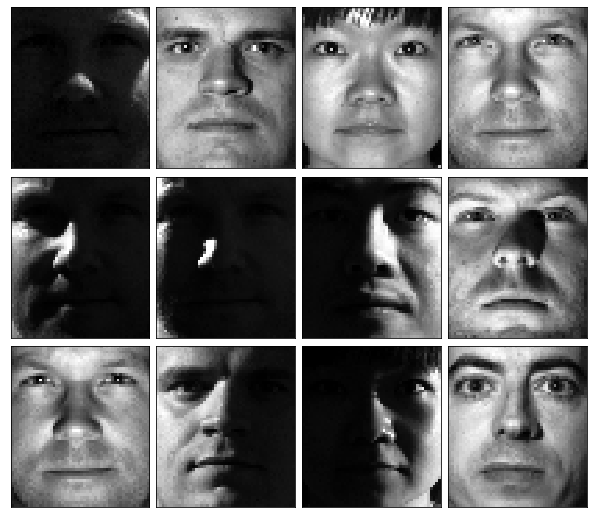

In [8]:
visualise_images(X, 12, 4)